Notebook to test whether one can obtain a good subtraction of the same image by first drizzling it and then blotting it back to its own reference frame.
This test seems to show that the convolution performed by astrodrizzle makes it impossible to actually work in the flt space with such a simplistic approach.

The notebook Show_differences_self highligths how the different AD kernel may give slghtly different results, by plotting the results from this one notebook



In [3]:
from astropy.io import fits
from stwcs import updatewcs
from drizzlepac import astrodrizzle, ablot
import glob, os, shutil
from multiprocessing import Pool
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool
from matplotlib.colors import PowerNorm
from stsci.tools import teal
from scipy.stats import sigmaclip
from AD_STP_utils.differential_imaging import driz_all,blot_back,subtract


%matplotlib notebook

In [4]:
#Setup the working directory and change into it

wdir = '/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence/Test_data/Test_self/'
os.chdir(wdir)

In [5]:
# Prepare the sorted list of flt file to be processed
# Print the exposure information 

flts = sorted(glob.glob('*flt.fits'))
for f in flts:
    fhdr = fits.getheader(f)
    print(f, fhdr['FILTER'], fhdr['TIME-OBS'], fhdr['POSTARG1'], fhdr['POSTARG2'], fhdr['EXPTIME'])

Exp1_flt.fits F140W 21:32:57 0.0 0.0 352.939514


In [6]:
# Create the drz images

ad_dict = {'median':False,
           'blot':False,
           'build':True,
           'driz_sep_kernel':'lanczos3',
           'driz_cr':False,
           'final_wcs':True,
           'final_rot':None,
           'final_scale':None,
           'final_outnx':1200,
           'final_outny':1200,
           'driz_combine':False,
           'num_cores':4
          }

driz_all(flts, ad_dict)


INPUT_DICT: {'final_outny': 1200, 'blot': False, 'final_rot': None, 'num_cores': 4, 'driz_combine': False, 'final_wcs': True, 'final_scale': None, 'driz_sep_kernel': 'lanczos3', 'input': 'Exp1_flt.fits', 'final_outnx': 1200, 'median': False, 'driz_cr': False, 'build': True}
Setting up logfile :  astrodrizzle.log

AstroDrizzle Version 2.1.3.dev(1-Feb-2016) started at: 16:48:26.292 (21/01/2017)

==== Processing Step  Initialization  started at  16:48:26.91 (21/01/2017)

Preserving original of:  Exp1_flt.fits as  OrIg_files/Exp1_flt.fits

********************************************************************************

*

*  Estimated memory usage:  up to 19 Mb.

*  Output image size:       1083 X 959 pixels. 

*  Output image file:       ~ 11 Mb. 

*  Cores available:         1

*

********************************************************************************

==== Processing Step  Initialization  finished at  16:48:58.650 (21/01/2017)

==== Processing Step  Static Mask  started at  16

In [7]:
# Main loop to blot first drz back to all flt frames, and subtract it out

flts = sorted(glob.glob('*flt.fits'))
drzs = sorted(glob.glob('*single_sci.fits'))
for f in flts:
    out = blot_back(drzs[0],f,f.replace('flt','firstblot'),0,1)
    print(out)
    subtract(out, f)

Running blot_back on:
Exp1_single_sci.fits Exp1_flt.fits Exp1_firstblot.fits
Using coordinate transformation defined by user...
Added 25.37446594238281 counts back in to blotted image as sky.


Found RULEFILE for  wfc3  of:  /Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/fitsblender/wfc3_header.rules


        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [fitsblender.blendheaders]


Created output image: Exp1_firstblot.fits
Exp1_firstblot.fits


/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


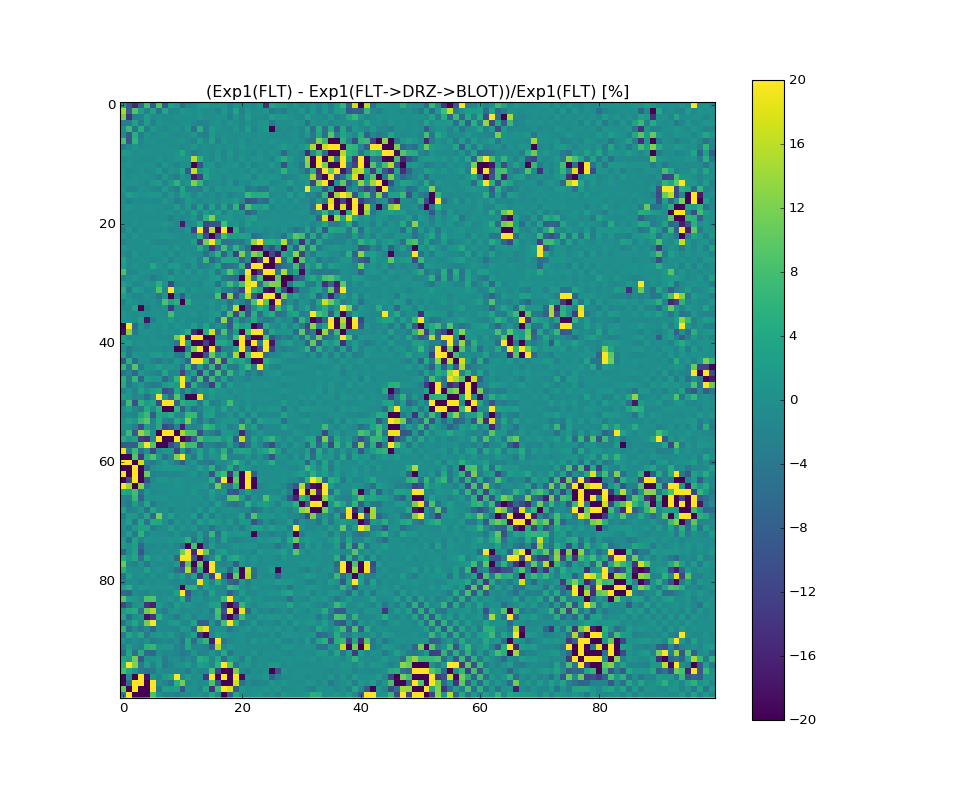

In [8]:
dflt = (fits.getdata(flts[0])-fits.getdata(flts[0].replace('flt','firstblot')))/fits.getdata(flts[0])
plt.figure(figsize=[12,10])
plt.imshow(100*dflt[250:350,250:350],cmap='viridis', interpolation='none', vmin=-20,vmax=20)
plt.colorbar()
plt.title('(Exp1(FLT) - Exp1(FLT->DRZ->BLOT))/Exp1(FLT) [%]')